This project will be evaluating the potential future sales of a given product using historic timseries data from Russia's 1C Company. Additionally, data will be translated for simple reading in the US

In [2]:
#first we must install the kaggle package
! pip install -q kaggle
from google.colab import files
files.upload() #this should be a valid API key.json generated from kaggle > my account

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"volkb1","key":"6927682c91da23849eff36d1b9cedb89"}'}

In [5]:
# now we prep the remote repo for data download
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

#and a sanity check
! kaggle datasets list 

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-04-28 17:13:57           3877  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2240  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            489  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   1GB  2021-02-18 10:08:27           1428  
mathurinache/twi

In [6]:
#download the data
! kaggle competitions download -c competitive-data-science-predict-future-sales
! mkdir ~/.kaggle/input
! mkdir ~/.kaggle/input/competitive-data-science-predict-future-sales
! ls ~/.kaggle/input
! unzip test.csv.zip -d ~/.kaggle/input/competitive-data-science-predict-future-sales
! unzip items.csv.zip -d ~/.kaggle/input/competitive-data-science-predict-future-sales
! cp item_categories.csv ~/.kaggle/input/competitive-data-science-predict-future-sales
! cp shops.csv ~/.kaggle/input/competitive-data-science-predict-future-sales
! unzip sales_train.csv.zip -d ~/.kaggle/input/competitive-data-science-predict-future-sales

#perform sanity check, there should be 5 things in here
! ls ~/.kaggle/input/competitive-data-science-predict-future-sales

  0% 0.00/3.49k [00:00<?, ?B/s]
100% 3.49k/3.49k [00:00<00:00, 6.42MB/s]
  0% 0.00/1.02M [00:00<?, ?B/s]
100% 1.02M/1.02M [00:00<00:00, 67.6MB/s]
  0% 0.00/468k [00:00<?, ?B/s]
100% 468k/468k [00:00<00:00, 142MB/s]
  0% 0.00/2.91k [00:00<?, ?B/s]
100% 2.91k/2.91k [00:00<00:00, 2.74MB/s]
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 113MB/s]
 38% 5.00M/13.3M [00:00<00:00, 38.3MB/s]
100% 13.3M/13.3M [00:00<00:00, 64.8MB/s]
mkdir: cannot create directory ‘/root/.kaggle/input’: File exists
mkdir: cannot create directory ‘/root/.kaggle/input/competitive-data-science-predict-future-sales’: File exists
competitive-data-science-predict-future-sales
Archive:  test.csv.zip
  inflating: /root/.kaggle/input/competitive-data-science-predict-future-sales/test.csv  
Archive:  items.csv.zip
  inflating: /root/.kaggle/input/competitive-data-science-predict-future-sales/items.csv  
Archive:  sales_train.csv.zip
  inflating: /root/.kaggle/input/competitive-data-science-predict-future-sales/

In [7]:
# Reading in the data
import numpy as np
import pandas as pd

#shops
shops = pd.read_csv('~/.kaggle/input/competitive-data-science-predict-future-sales/shops.csv')
shops.head(20)

#item_categories
item_categories = pd.read_csv('~/.kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv')
#item_categories.head(20)

#sales train
sales_train_import = pd.read_csv('~/.kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv')
#sales_train_import.head(20)

#test
#test_import = pd.read_csv('~/.kaggle/input/competitive-data-science-predict-future-sales/test.csv')
#test_import.head(20)

Now that we have the data imported, we can begin to examine it. This is timeseries data so the first vector of outliars we may have to remove is particular dates where sales volumes is not representative of the rest of the quarter or year per shop.

date
1     115690
2     108613
3     121347
4      94109
5      91759
6     100403
7     100548
8     104772
9      96137
10     94202
11     96736
12    143246
Name: date, dtype: int64


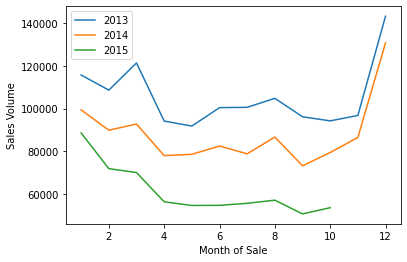

In [8]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame

#group the data by date and number of transactions per year
#print(sales_train_import.dtypes)
sales_train_import['date'] = pd.to_datetime(sales_train_import['date'], format='%d.%m.%Y')
#print(sales_train_import.dtypes)
date_groups = sales_train_import.groupby([sales_train_import.date.dt.year,sales_train_import.date.dt.month]).agg('count')
date_groups_chart = date_groups["date"]
date_group_2013 = date_groups_chart[2013]
date_group_2014 = date_groups_chart[2014]
date_group_2015 = date_groups_chart[2015]

#generate line graph
print(date_groups_chart[2013])
fig, ax = plt.subplots()
ax.plot(date_group_2013,label='2013')
ax.plot(date_group_2014,label='2014')
ax.plot(date_group_2015,label='2015')
ax.set_xlabel("Month of Sale")
ax.set_ylabel("Sales Volume")
leg = ax.legend();

#as expected sales jumped in the month of December


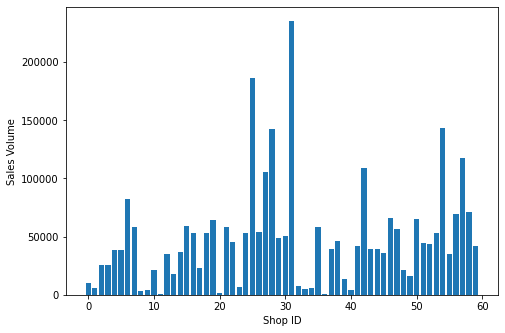

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [9]:
#now lets see if we can have a look at sales volumes per shop, per year (note: there are 59 uniques shops in the set)
test = sales_train_import.groupby([sales_train_import.shop_id]).agg('count')
shop_skew = test["date"] # because we are performing an aggergation, date which is the first column is overwriten with the group data, we could rename this but its easier to just set it to a new variable.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
shop = shops['shop_id']
counts = shop_skew
ax.bar(shop,counts)
ax.set_xlabel("Shop ID")
ax.set_ylabel("Sales Volume")
plt.show()

#as we can see here, shop 31 is clearly the largest, we may consider removing that from the set to build out models since its sales are not representative to the rest of the set.
shops.head(31)
#this makes sense. ShopID 31 is a super mall in Moscow: Москва ТЦ "Перловский" = Moscow TC "Perlovsky" 


             price  price_count
0           0.0700            2
1           0.0875            1
2           0.0900            1
3           0.1000         2932
4           0.2000            1
...            ...          ...
19987   42990.0000            4
19988   49782.0000            1
19989   50999.0000            1
19990   59200.0000            1
19991  307980.0000            1

[19992 rows x 2 columns]


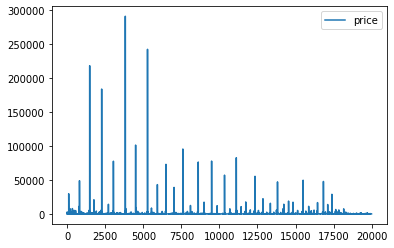

In [10]:
#because we need to predict on this data, it is important to determine what "bins" our price categories can be placed into, this may help us pick an algo.

import seaborn as sns

sales_train_import = sales_train_import[sales_train_import['item_price'] > 0]
test3 = sales_train_import.groupby([sales_train_import.item_price]).agg('count')
test3 = test3['date']
test3.describe()

df3 = test3.reset_index()
df3.rename(columns = {'item_price' : 'price', 'date' : 'price_count'}, inplace = True)
print(df3)
#Price_categories.value_counts()
fig3, ax = plt.subplots()
ax.plot(df3['price_count'], label = 'price')
leg = ax.legend();

#the prices are in RUB and tend to be skewed toward cheaper items. this means our data is coorlated with category.


With exploration done, we can now begin the prediciton methodology. For the base algorythm, we are going to use a random forest regressor because of the high corilation found above within the features.

**Note**: as you can see above, we are not importing the given test data set. This is done because the features of the data set are not the same representative features of the training set and therefore, it would be more benificial for us to derive our own test set as seen below. This will help us later if data enrichment is needed.

**Note**: Because we are using basic colab to perform this complex join and aggergation, the colab notebook crashes with an OOM error, so instead we will read the aggergation from a pre-made flat file from MS SQL SERVER. The script to re-create this data is found on the github in /SQL

In [79]:
#import the packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

#pre-process by dropping any NA values
#sales_train_import = sales_train_import.dropna()

#because item price is static and each record represents a transaction, we need to group our data by the frequency of transactions per day
#Item_freq = sales_train_import
#Item_freq = sales_train_import.filter(['date','item_id','price'], axis=1)

#Item_Prices = sales_train_import.filter(['item_id','price'], axis=1)

#Item_freq_temp = Item_freq.groupby(["date","item_id"])["item_id"].count()
#Item_freq_temp2 = DataFrame({'count' : Item_freq_temp.groupby( [ "date", "item_id"] ).size()}).reset_index()

#inner_merged_total = pd.merge(Item_freq_temp2, Item_Prices, on=["item_id"])
aggergates = pd.read_csv('https://raw.githubusercontent.com/volkb/introMLProject/master/data_aggergate.csv', error_bad_lines=False)




with our data imported now, we can create our train and test set

In [80]:
X = aggergates.drop('profit',axis=1)
y = aggergates['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

RFR = RandomForestRegressor(n_estimators=20, random_state=0)
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

and now we run the prediction

In [ ]:
#running the prediction
y_pred = RFR.predict(X_test)


6194.498275567447


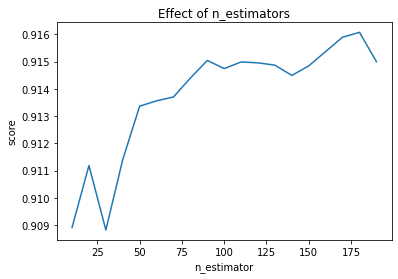

In [ ]:
#evaluating the result
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFECV

#mse
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)
#as we can see here the mean squared error is very large. Lets try some tuning

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    RFR.set_params(n_estimators=n)
    RFR.fit(X_train, y_train)
    scores.append(RFR.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

#The graph below shows us a possible tuning parameter

With our major hyper parameter adjusted, lets re-fit and try again

In [ ]:
RFR = RandomForestRegressor(n_estimators=170, random_state=0,max_depth=70,min_samples_leaf=4,min_samples_split=10)
RFR.fit(x_train,y_train)

print('SCORE: %s' % RFR.score(X_test, y_test))
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

SCORE: 0.8861249360032011
6194.498275567447


In [ ]:
# 88% is not bad at all, but lets see if we can adjust this a little more, then try and address that MSE
RFR = RandomForestRegressor(n_estimators=170, random_state=42)
RFR.fit(x_train,y_train)

print('SCORE: %s' % RFR.score(X_test, y_test))
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)
#score is now a 91%, great! but we still need to address the high RMSE value

SCORE: 0.9177643299320856
6194.498275567447


We have a solid score now, but we need to explore our test and train sets a bit more to see why the RMSE value is so high

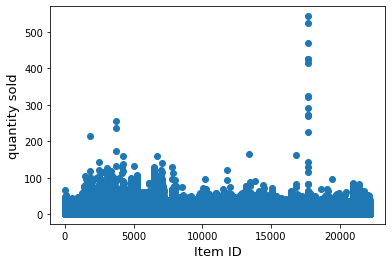

Empty DataFrame
Columns: [saleMonth, SaleYear, item_id, item_category_id, qty, profit]
Index: []


In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = x_train['item_id'], y = x_train['qty'])
plt.ylabel('quantity sold', fontsize=13)
plt.xlabel('Item ID', fontsize=13)
plt.show()

In [88]:
aggergates = aggergates.drop(aggergates[(aggergates['qty']>240)].index)
X = aggergates.drop('profit',axis=1)
y = aggergates['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

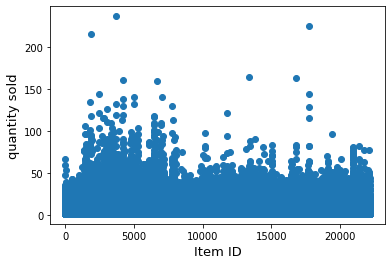

In [89]:
# now lets try again
fig, ax = plt.subplots()
ax.scatter(x = X_train['item_id'], y = X_train['qty'])
plt.ylabel('quantity sold', fontsize=13)
plt.xlabel('Item ID', fontsize=13)
plt.show()
# much better

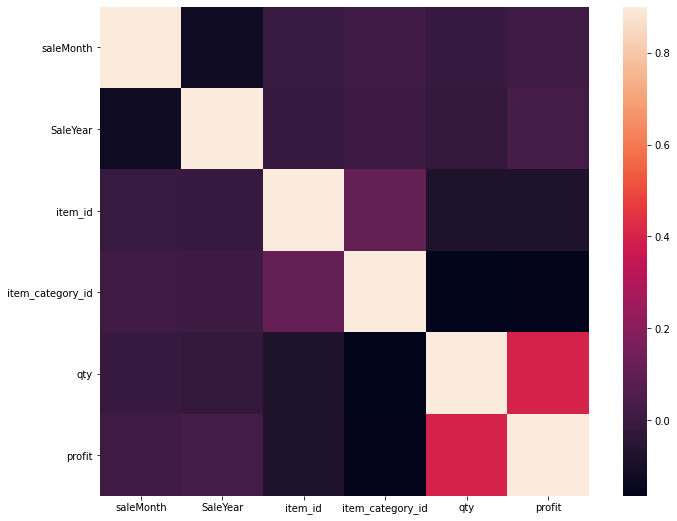

In [ ]:
from scipy.stats import norm
from scipy import stats
import seaborn as sns

#now lets check the coorlation of the data
corrmat = aggergates.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)


        saleMonth  SaleYear  item_id  item_category_id  qty        profit
0               1      2013     3686                19   64  55212.096667
1               9      2013    19953                67    2   1396.000000
2               9      2013    13996                40   16   2105.000000
3               3      2013     8951                38    9   1791.000000
4               7      2014     6540                25    3   2697.000000
...           ...       ...      ...               ...  ...           ...
233873          4      2013     1747                58    1   1449.000000
233874         10      2015    20571                72    1    799.000000
233875          9      2015    10314                40    1    249.000000
233876          9      2015     6028                58    1   2799.000000
233877          4      2013    10087                40    1     70.000000

[233862 rows x 6 columns]


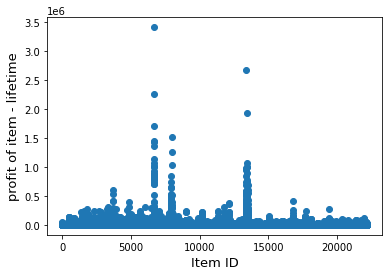

In [90]:
print(aggergates)
fig, ax = plt.subplots()
ax.scatter(x = aggergates['item_id'], y = aggergates['profit'])
plt.ylabel('profit of item - lifetime', fontsize=13)
plt.xlabel('Item ID', fontsize=13)
plt.show()

#ah mroe outliars to drop
aggergates = aggergates.drop(aggergates[(aggergates['profit']>20000)].index)
X = aggergates.drop('profit',axis=1)
y = aggergates['profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

        saleMonth  SaleYear  item_id  item_category_id  qty  profit
1               9      2013    19953                67    2  1396.0
2               9      2013    13996                40   16  2105.0
3               3      2013     8951                38    9  1791.0
4               7      2014     6540                25    3  2697.0
5               7      2015    18099                57    4  1316.0
...           ...       ...      ...               ...  ...     ...
233873          4      2013     1747                58    1  1449.0
233874         10      2015    20571                72    1   799.0
233875          9      2015    10314                40    1   249.0
233876          9      2015     6028                58    1  2799.0
233877          4      2013    10087                40    1    70.0

[220271 rows x 6 columns]


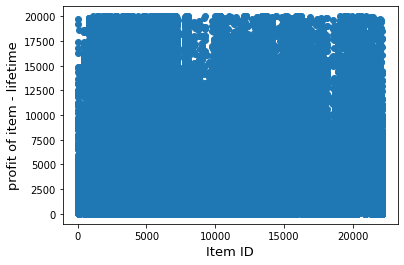

In [91]:
#lets see that again
print(aggergates)
fig, ax = plt.subplots()
ax.scatter(x = aggergates['item_id'], y = aggergates['profit'])
plt.ylabel('profit of item - lifetime', fontsize=13)
plt.xlabel('Item ID', fontsize=13)
plt.show()

It looks like we are still seeing a decently long tail in our exploration, lets apply some additional macro filtering to take out the left skew.

**Note**: see SQL script in github, due to the limitations oif colab, this is another import as above which simply refines and applies the drops shown above

In [108]:
aggergates_filtered = pd.read_csv('https://raw.githubusercontent.com/volkb/introMLProject/master/data_aggergates_filtered.csv')
aggergates_filtered = aggergates_filtered.dropna()


In [ ]:
#grab our test and training set
X2 = aggergates_filtered.drop('profit',axis=1)
y2 = aggergates_filtered['profit']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=42)

#train the model
RFR = RandomForestRegressor(n_estimators=170, random_state=42)
RFR.fit(X_train2,y_train2)

In [99]:
#run the prediction
y_pred2 = RFR.predict(X_test2)

#and the metrics
print('SCORE: %s' % RFR.score(X_test2, y_test2))
mse = mean_squared_error(y_test2,y_pred2)
rmse = np.sqrt(mse)
print(rmse)

#as we can see, the RMSE is MUCH lower than before as the data is much more normalized now, and the accuracy is still around 91%

SCORE: 0.9110808756740989
247.7897878921512
